In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#测试集与训练集划分，和数据预处理（归一化）
import numpy as np
import pandas as pd
dataset=pd.read_csv('C://Users//zhou//Desktop/iris.csv')
dataset=np.array(dataset)
data_test1=dataset[0:10,0:]
data_test2=dataset[50:60,0:]
data_test3=dataset[100:110,0:]
data_test=np.vstack((data_test1,data_test2))
data_test=np.vstack((data_test,data_test3))
data_train1=dataset[10:50,0:]
data_train2=dataset[60:100,0:]
data_train3=dataset[110:,0:]
data_train=np.vstack((data_train1,data_train2))
data_train=np.vstack((data_train,data_train3))
data_train_label=data_train[0:,-1]
data_train=data_train[0:,0:4]
coun=0
data_test_label=data_test[0:,-1]
data_test=data_test[0:,0:4]
for label in data_test_label:
    coun+=1
    if  label=='Iris-setosa':
        data_test_label[coun-1]=0
    if label=='Iris-versicolor':
        data_test_label[coun-1]=1
    if label=='Iris-virginica':
        data_test_label[coun-1]=2
coun1=0
for label1 in data_train_label:
    coun1+=1
    if  label1=='Iris-setosa':
        data_train_label[coun1-1]=0
    if label1=='Iris-versicolor':
        data_train_label[coun1-1]=1
    if label1=='Iris-virginica':
        data_train_label[coun1-1]=2   
data_train1=data_train
data_train=(data_train-data_train.mean(axis=0))/(data_train.max(axis=0)-data_train.min(axis=0))
data_test=(data_test-data_test.mean(axis=0))/(data_test.max(axis=0)-data_test.min(axis=0))

In [3]:
def k_means(dataset,k,maxiter):
    dataset=np.mat(dataset)
    center_list=[]
    candidate=[]
    iter_num=0
    for i in range(k):
        center_list.append([])
        candidate.append([])
    for count in range(k):
        center_list[count].append(dataset[count*50])
    while iter_num<maxiter:
        for feature in dataset:
            distance_list=[]
            for center in center_list:
                distance=np.linalg.norm(feature-center[0])
                distance_list.append(distance)
            candidate[distance_list.index(min(distance_list))].append(feature)
        for i in range(k):
            center_list[i][0]=sum(candidate[i])/len(candidate[i])
        iter_num+=1
    return center_list       

In [4]:
#k_means正确率测试
k_means_count=0
k_means_count_true=0
center_list=k_means(data_train,3,50)
for sample in data_test:
    k_means_count+=1
    distance_list=[]
    for center in center_list:
        disance=np.linalg.norm(sample-center[0])
        distance_list.append(disance)
    if distance_list.index(min(distance_list))==data_test_label[k_means_count-1]:
        k_means_count_true+=1
print(k_means_count_true/k_means_count)

0.8666666666666667


In [5]:
#PCA数据降维
def PCA(matX,k):
    average=np.mean(matX,axis=0)
    m,n=matX.shape
    avgs=np.tile(average,(m,1))
    data_adjust=matX-avgs
    data_adjust=np.array(data_adjust,dtype=float)
    covX=np.cov(data_adjust.T)
    feaValue,feaVec=np.linalg.eig(covX)
    index=np.argsort(-feaValue)
    selectVec=np.matrix(feaVec.T[index[:k]])
    final=matX*selectVec.T
    return(final)

In [6]:
data_train_down=PCA(data_train,2)
data_test_down=PCA(data_test,2)

In [7]:
from matplotlib import pyplot as plt
def visual_and_predict(dataset,maxiter,data_test):
    data_test=np.mat(data_test)
    dataset=np.mat(dataset)
    plt.figure(figsize=(30,15),dpi=80)
    list_color=[]
    count=0
    data_train_down=PCA(data_train,2)
    for i in range(3):
        list_color.append([])
    center_list=k_means(dataset,3,maxiter)
    for i in dataset:
        count+=1
        distance_list=[]
        for center in center_list:
            distance=np.linalg.norm(center[0]-i)
            distance_list.append(distance)
        index=distance_list.index(min(distance_list))
        list_color[index].append(data_train_down[count-1])
    plt.scatter([list_color[0][i][0,0] for i in range(len(list_color[0]))],[list_color[0][j][0,1] for j in range(len(list_color[0]))],color='red')
    plt.scatter([list_color[1][i][0,0] for i in range(len(list_color[1]))],[list_color[1][j][0,1] for j in range(len(list_color[1]))],color='blue')
    plt.scatter([list_color[2][i][0,0] for i in range(len(list_color[2]))],[list_color[2][j][0,1] for j in range(len(list_color[2]))],color='yellow')
    distance_list1=[]
    data_test_down=PCA(data_test,2)
    count1=0
    list_color1=[]
    for i in range(3):
        list_color1.append([])
    for sample in data_test:
        count1+=1
        distance_list1=[]
        for center in center_list:
            disance1=np.linalg.norm(center[0]-sample)
            distance_list1.append(disance1)
        index=distance_list1.index(min(distance_list1))
        list_color1[index].append(data_test_down[count1-1])
    plt.scatter([list_color1[0][i][0,0] for i in range(len(list_color1[0]))],[list_color1[0][j][0,1] for j in range(len(list_color1[0]))],color='red')
    plt.scatter([list_color1[1][i][0,0] for i in range(len(list_color1[1]))],[list_color1[1][j][0,1] for j in range(len(list_color1[1]))],color='blue')
    plt.scatter([list_color1[2][i][0,0] for i in range(len(list_color1[2]))],[list_color1[2][j][0,1] for j in range(len(list_color1[2]))],color='yellow')
        


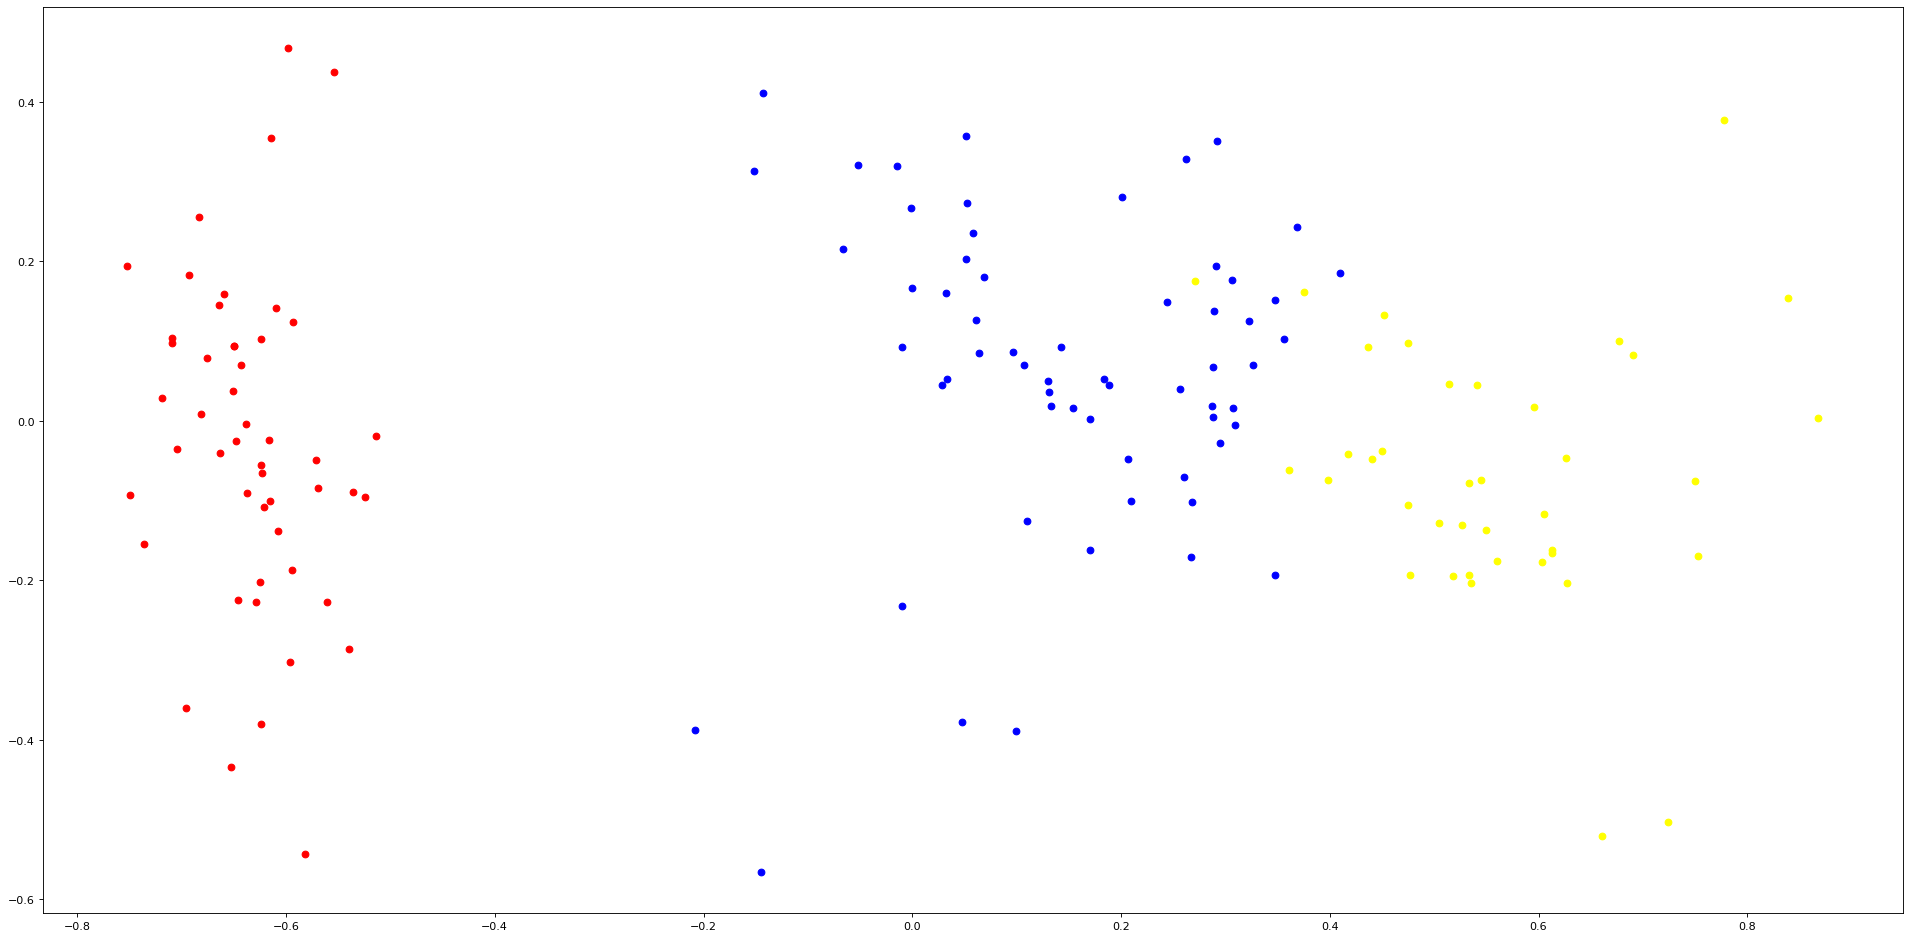

In [8]:
visual_and_predict(data_train,50,data_test)

In [9]:
import numpy as np

In [10]:
def pro_debsity(x,miu,sigma):
    return (1/(2*np.pi*(sigma**2))**0.5)*np.exp(-(1/(2*(sigma**2)))*((x-miu)**2).sum(axis=1))

In [11]:
def GMM(dataset,maxiter):
    dataset=np.array(dataset,dtype=float)
    m,n=dataset.shape
    miu_A=np.array([-0.6,0])
    miu_B=np.array([0,0])
    miu_C=np.array([1,0])
    sigma_A=sum(sum((dataset-miu_A)**2))/m
    sigma_B=sum(sum((dataset-miu_B)**2))/m
    sigma_C=sum(sum((dataset-miu_C)**2))/m
    iter_num=0
    while iter_num<maxiter:
        iter_num+=1
        list_A_score=[]
        list_B_score=[]
        list_C_score=[]
        A_pro=pro_debsity(dataset,miu_A,sigma_A)
        B_pro=pro_debsity(dataset,miu_B,sigma_B)
        C_pro=pro_debsity(dataset,miu_C,sigma_C)
        for i in range(m):
            list_A_score.append(A_pro[i]/(A_pro[i]+B_pro[i]+C_pro[i]))
            list_B_score.append(B_pro[i]/(A_pro[i]+B_pro[i]+C_pro[i]))
            list_C_score.append(C_pro[i]/(C_pro[i]+A_pro[i]+B_pro[i]))
        array_A_score=np.array(list_A_score)
        array_B_score=np.array(list_B_score)
        array_C_score=np.array(list_C_score)
        miu_A=dataset.T.dot(array_A_score)/sum(array_A_score)
        miu_B=dataset.T.dot(array_B_score)/sum(array_B_score)
        miu_C=dataset.T.dot(array_C_score)/sum(array_C_score)
        sigma_A=[]
        sigma_B=[]
        sigma_C=[]
        for i in range(m):
            sigma_A.append(array_A_score[i]*(dataset[i]-miu_A).dot((dataset[i]-miu_A).T))
            sigma_B.append(array_B_score[i]*(dataset[i]-miu_B).dot((dataset[i]-miu_B).T))
            sigma_C.append(array_C_score[i]*(dataset[i]-miu_C).dot((dataset[i]-miu_C).T))
        sigma_A=sum(sigma_A)/sum(array_A_score)
        sigma_B=sum(sigma_B)/sum(array_B_score)
        sigma_C=sum(sigma_C)/sum(array_C_score)
    list_miu=[miu_A,miu_B,miu_C]
    list_sigma=[sigma_A,sigma_B,sigma_C]
    return list_miu,list_sigma

In [12]:
GMM(data_train_down,4)

([array([-0.61449642, -0.05793615]),
  array([0.12953137, 0.04999719]),
  array([0.30915833, 0.02914817])],
 [0.04768770310819331, 5.287148818856069e-29, 0.08358271178176528])

In [13]:
#GMM正确率测试
GMM_count=0
GMM_count_true=0
list_miu,list_sigma=GMM(data_train_down,1)
for sample in data_test_down:
    sample=sample.reshape(1,2)
    sample=np.array(sample,dtype=float)
    GMM_count+=1
    list_label=[]
    for i in range(3):
        list_label.append(pro_debsity(sample,list_miu[i],list_sigma[i]))
    if list_label.index(max(list_label))==data_test_label[GMM_count-1]:
        GMM_count_true+=1
print(GMM_count_true/GMM_count)

0.7666666666666667


In [14]:
#贝叶斯网络
def NBtrain(data_train,data_label):
    h=len(set(data_label.tolist()))
    data_train_mean=data_train.mean(axis=0)
    m,n=data_train.shape
    data_num=np.zeros((h,n,2))
    count=0
    for sample in data_train:
        count+=1
        for count_feature in range(len(sample)):
            if sample[count_feature]>=data_train_mean[count_feature]:
                data_num[data_label[count-1]][count_feature,0]+=1
            else:
                data_num[data_label[count-1]][count_feature,1]+=1
    data_pro=np.zeros((h,n,2))
    for i in range(h):
        for count_feature in range(len(data_train[0])):
            data_pro[i][count_feature,0]=(data_num[i][count_feature,0]+1)/(sum(data_num[i][count_feature])+4)
            data_pro[i][count_feature,1]=(data_num[i][count_feature,1]+1)/(sum(data_num[i][count_feature])+4)
    list_pro_label=[]
    count1=0
    count2=0
    count3=0
    for label in data_label:
        if label==0:
            count1+=1
        if label==1:
            count2+=1
        if label==2:
            count3+=1
    list_pro_label.append(count1/m)
    list_pro_label.append(count2/m)
    list_pro_label.append(count3/m)
    return data_pro,list_pro_label,data_train_mean

In [15]:
#分类器
def NBclassify(data_train,data_train_label,sample):
    data_pro,list_pro_label,data_train_mean=NBtrain(data_train,data_train_label)
    h,m,n=data_pro.shape
    list_pro=[]
    for label in range(h):
        pro=1
        for feature_num in range(m):
            if sample[feature_num]>=data_train_mean[feature_num]:
                pro*=data_pro[label][feature_num,0]
            else:
                pro*=data_pro[label][feature_num,1]
        list_pro.append(pro)
    return list_pro.index(max(list_pro))

In [16]:
#贝叶斯的正确率计算
count=0
count_true=0
for sample in data_test:
    count+=1
    label=NBclassify(data_train,data_train_label,sample)
    if label==data_test_label[count-1]:
        count_true+=1
print(count_true/count)

0.7333333333333333


In [364]:
boston=pd.read_csv('C://Users//zhou//Desktop/housing.data')

In [365]:
f=open('C://Users//zhou//Desktop/housing.data','r')

In [366]:
list1=[]
for line in f.readlines():
    line=line.strip().split()
    list1.append(line)
data=pd.DataFrame(list1)

In [367]:
def str_to_float(arr):
    m,n=arr.shape
    for i in range(m):
        arr[i][0]=float(arr[i][0])
    return arr

In [368]:
data_CRIM=str_to_float(np.array(data.iloc[0:,[0]]))
data_ZN=str_to_float(np.array(data.iloc[0:,[1]]))
data_INDUS=str_to_float(np.array(data.iloc[0:,[2]]))
data_CHAS=str_to_float(np.array(data.iloc[0:,[3]]))
data_NOX=str_to_float(np.array(data.iloc[0:,[4]]))
data_RM=str_to_float(np.array(data.iloc[0:,[5]]))
data_AGE=str_to_float(np.array(data.iloc[0:,[6]]))
data_DIS=str_to_float(np.array(data.iloc[0:,[7]]))
data_RAD=str_to_float(np.array(data.iloc[0:,[8]]))
data_TAX=str_to_float(np.array(data.iloc[0:,[9]]))
data_PTRATIO=str_to_float(np.array(data.iloc[0:,[10]]))
data_B=str_to_float(np.array(data.iloc[0:,[11]]))
data_LSTAT=str_to_float(np.array(data.iloc[0:,[12]]))
data_MEDV=str_to_float(np.array(data.iloc[0:,[13]]))

In [369]:
def k_means(dataset,k,maxiter):
    dataset=np.mat(dataset)
    center_list=[]
    candidate=[]
    iter_num=0
    for i in range(k):
        center_list.append([])
        candidate.append([])
    for count in range(k):
        center_list[count].append(dataset[count*50])
    while iter_num<maxiter:
        for feature in dataset:
            distance_list=[]
            for center in center_list:
                distance=np.linalg.norm(feature-center[0])
                distance_list.append(distance)
            candidate[distance_list.index(min(distance_list))].append(feature)
        for i in range(k):
            center_list[i][0]=sum(candidate[i])/len(candidate[i])
        iter_num+=1
    return center_list       

In [370]:
k_means(data_AGE,3,20)[0][0][0,0]

63.23172995780596

In [371]:
def vote_label(sample,center_list):
    sample=sample[0]
    list_label=[0,1,2]
    center_new=[]
    for i in center_list:
        center_new.append(i[0][0,0])
    center_new.sort()
    distance_list=[]
    for center in center_new:
        center=float(center)
        disance=abs(sample-center)
        distance_list.append(disance)
    return list_label[distance_list.index(min(distance_list))]

In [372]:
list_data=[data_AGE,data_B,data_CRIM,data_DIS,data_INDUS,data_LSTAT,data_MEDV,data_NOX,data_PTRATIO,data_RAD,data_RM,data_TAX,data_ZN]

In [373]:
for data in list_data:
    center_list=k_means(data,3,20)
    for i in data:
        i[0]=vote_label(i,center_list)

In [374]:
data_final=np.hstack((data_CRIM,data_ZN,data_INDUS,data_CHAS,data_NOX,data_RM,data_AGE,data_DIS,data_RAD,data_TAX,data_PTRATIO,data_B,data_LSTAT,data_MEDV))

In [375]:
data_final

array([[0, 1, 0, ..., 2, 0, 1],
       [0, 0, 1, ..., 2, 1, 1],
       [0, 0, 1, ..., 2, 0, 2],
       ...,
       [0, 0, 1, ..., 2, 0, 1],
       [0, 0, 1, ..., 2, 0, 1],
       [0, 0, 1, ..., 2, 0, 0]], dtype=object)

In [376]:
nb_data_train=data_final[150:,0:-1]
nb_data_train_label=data_final[150:,-1]
nb_data_test=data_final[0:150,0:-1]
nb_data_test_label=data_final[0:150,-1]

In [377]:
nb_data_train.shape

(356, 13)

In [378]:
def NBtrain_2(nb_data_train,nb_data_train_label):
    h=len(set(nb_data_train_label[0:].tolist()))
    m1,=nb_data_train[0:,2].shape
    data_num_1=np.zeros((h,2,3))
    for i in range(3):
        for num in range(m1):
            for a in range(3):
                if nb_data_train[0:,1][num]==a:
                    data_num_1[i][0,a]+=1
                if nb_data_train[0:,6][num]==a:
                    data_num_1[i][1,a]+=1
    data_num_2=np.zeros((h,2,3))
    for i in range(3):
        for num in range(m1):
            for a in range(3):
                if nb_data_train[0:,11][num]==a:
                    data_num_2[i][0,a]+=1
                if nb_data_train[0:,12][num]==a:
                    data_num_2[i][1,a]+=1
    data_num_3=np.zeros((h,9,3))
    for i in range(3):
        for num in range(m1):
            for a in range(3):
                if nb_data_train[0:,9][num]==a:
                    data_num_3[i][0,a]+=1
                if nb_data_train[0:,2][num]==a:
                    data_num_3[i][1,a]+=1
                if nb_data_train[0:,3][num]==a:
                    data_num_3[i][2,a]+=1
                if nb_data_train[0:,0][num]==a:
                    data_num_3[i][3,a]+=1
                if nb_data_train[0:,4][num]==a:
                    data_num_3[i][4,a]+=1
                if nb_data_train[0:,5][num]==a:
                    data_num_3[i][5,a]+=1
                if nb_data_train[0:,7][num]==a:
                    data_num_3[i][6,a]+=1
                if nb_data_train[0:,8][num]==a:
                    data_num_3[i][7,a]+=1
                if nb_data_train[0:,10][num]==a:
                    data_num_3[i][8,a]+=1
    data_num_1_pro=np.zeros((h,2,3))
    data_num_2_pro=np.zeros((h,2,3))
    data_num_3_pro=np.zeros((h,9,3))
    for i in range(3):
        for a in range(2):
            sum_1=sum(data_num_1[i][a,0:])
            for label in range(3):
                data_num_1_pro[i][a,label]=(1+data_num_1[i][a,label])/(sum_1+3)
    for i in range(3):
        for a in range(2):
            sum_2=sum(data_num_2[i][a,0:])
            for label in range(3):
                data_num_2_pro[i][a,label]=(1+data_num_2[i][a,label])/(sum_2+3)
    for i in range(3):
        for a in range(9):
            sum_3=sum(data_num_3[i][a,0:])
            for label in range(3):
                data_num_3_pro[i][a,label]=(1+data_num_3[i][a,label])/(sum_2+3)
    count_0=0
    count_1=0
    count_2=0
    for i in nb_data_train_label:
        if i==0:
            count_0+=1
        if i==1:
            count_1+=1
        if i==2:
            count_2+=1
    pro_0=count_0/(count_0+count_1+count_2)
    pro_1=count_1/(count_0+count_1+count_2)
    pro_2=count_2/(count_0+count_1+count_2)
    return pro_0,pro_1,pro_2,data_num_1_pro,data_num_2_pro,data_num_3_pro
        
                
    

In [379]:
NBtrain_2(nb_data_train,nb_data_train_label)

(0.33146067415730335,
 0.4859550561797753,
 0.18258426966292135,
 array([[[0.72423398, 0.16991643, 0.10584958],
         [0.26183844, 0.2367688 , 0.50139276]],
 
        [[0.72423398, 0.16991643, 0.10584958],
         [0.26183844, 0.2367688 , 0.50139276]],
 
        [[0.72423398, 0.16991643, 0.10584958],
         [0.26183844, 0.2367688 , 0.50139276]]]),
 array([[[0.12256267, 0.24233983, 0.63509749],
         [0.36768802, 0.36490251, 0.26740947]],
 
        [[0.12256267, 0.24233983, 0.63509749],
         [0.36768802, 0.36490251, 0.26740947]],
 
        [[0.12256267, 0.24233983, 0.63509749],
         [0.36768802, 0.36490251, 0.26740947]]]),
 array([[[0.31197772, 0.30362117, 0.38440111],
         [0.28412256, 0.24512535, 0.47075209],
         [0.89972145, 0.09749304, 0.00278552],
         [0.57660167, 0.22562674, 0.19777159],
         [0.26183844, 0.41225627, 0.32590529],
         [0.34261838, 0.47075209, 0.18662953],
         [0.57103064, 0.24791086, 0.1810585 ],
         [0.11977716, 0.

In [380]:
import math
math.log10(0.0000001)

-7.0

In [381]:
NBtrain_2(nb_data_train,nb_data_train_label)

(0.33146067415730335,
 0.4859550561797753,
 0.18258426966292135,
 array([[[0.72423398, 0.16991643, 0.10584958],
         [0.26183844, 0.2367688 , 0.50139276]],
 
        [[0.72423398, 0.16991643, 0.10584958],
         [0.26183844, 0.2367688 , 0.50139276]],
 
        [[0.72423398, 0.16991643, 0.10584958],
         [0.26183844, 0.2367688 , 0.50139276]]]),
 array([[[0.12256267, 0.24233983, 0.63509749],
         [0.36768802, 0.36490251, 0.26740947]],
 
        [[0.12256267, 0.24233983, 0.63509749],
         [0.36768802, 0.36490251, 0.26740947]],
 
        [[0.12256267, 0.24233983, 0.63509749],
         [0.36768802, 0.36490251, 0.26740947]]]),
 array([[[0.31197772, 0.30362117, 0.38440111],
         [0.28412256, 0.24512535, 0.47075209],
         [0.89972145, 0.09749304, 0.00278552],
         [0.57660167, 0.22562674, 0.19777159],
         [0.26183844, 0.41225627, 0.32590529],
         [0.34261838, 0.47075209, 0.18662953],
         [0.57103064, 0.24791086, 0.1810585 ],
         [0.11977716, 0.

In [382]:
for i in range(150):
    if nb_data_test[0:,3][i]==0.0:
        nb_data_test[0:,3][i]=0
    if nb_data_test[0:,3][i]==1.0:
        nb_data_test[0:,3][i]=1


In [383]:
nb_data_test[0:,3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [384]:
nb_data_test.shape

(150, 13)

In [385]:
import math
def NBclassify_2(pro_0,pro_1,pro_2,data_num_1_pro,data_num_2_pro,data_num_3_pro,sample):
    pro_INDES_list=[]
    pro_CRIM_list=[]
    for i in range(3):
        pro_INDES_list.append(math.log10(data_num_1_pro[i][0,sample[1]]*data_num_1_pro[i][1,sample[6]]))
        pro_CRIM_list.append(math.log10(data_num_2_pro[i][0,sample[11]]*data_num_2_pro[i][1,sample[12]]))
    list_all=[]
    for i in range(3):
        pro_all=list_all.append(math.log10(data_num_3_pro[i][0,sample[9]]*data_num_3_pro[i][1,sample[2]]*data_num_3_pro[i][2,sample[3]]*data_num_3_pro[i][3,sample[0]]*data_num_3_pro[i][4,sample[4]]*data_num_3_pro[i][5,sample[5]]*data_num_3_pro[i][6,sample[7]]*data_num_3_pro[i][7,sample[8]]*data_num_3_pro[i][8,sample[10]]))
    list_vote=[]
    list_pro=[]
    list_pro.append(math.log10(pro_0))
    list_pro.append(math.log10(pro_1))
    list_pro.append(math.log10(pro_2))
    for i in range(3):
        list_vote.append(list_all[i]+pro_INDES_list[i]+pro_CRIM_list[i]+list_pro[i])
    return list_vote.index(max(list_vote))

In [386]:
#正确率测试
count1=0
count2=0
pro_0,pro_1,pro_2,data_num_1_pro,data_num_2_pro,data_num_3_pro=NBtrain_2(nb_data_train,nb_data_train_label)
for sample in nb_data_test:
    count1+=1
    pro_true=NBclassify_2(pro_0,pro_1,pro_2,data_num_1_pro,data_num_2_pro,data_num_3_pro,sample)
    if nb_data_test_label[count1-1]==pro_true:
        count2+=1
print(count2/count1)

0.6066666666666667
